import the modules and get dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
import cv2
import data
from PIL import Image
import dlib
import data_process
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")


In [2]:
x,y, a = data_process.process_data('dataset.csv', "CNN")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
val_data = (X_test,y_test)

import keras for the model training and layers

In [34]:
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D,ZeroPadding2D, MaxPool2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

create the model with it's layers:

In [4]:
input_shape=(48, 48, 1)
num_classes = 4

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=input_shape))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

import data generator

In [5]:
from keras.preprocessing.image import ImageDataGenerator


compile the model:

In [46]:
%%time
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        horizontal_flip=True)
batch_size = 32
opt = RMSprop(lr=0.0005, decay=1e-6)

model_1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_1 = model_1.fit_generator(data_generator.flow(X_train, y_train,
                                            batch_size),
                        epochs=20, verbose=1,validation_data =val_data)

Epoch 1/20
11/11 [==============================] - 0s 23ms/step - loss: 0.4355 - accuracy: 0.8131 - val_loss: 0.2863 - val_accuracy: 0.8679
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 0.3717 - accuracy: 0.8598 - val_loss: 0.3731 - val_accuracy: 0.8239
Epoch 3/20
11/11 [==============================] - 0s 13ms/step - loss: 0.3478 - accuracy: 0.8629 - val_loss: 0.2621 - val_accuracy: 0.8302
Epoch 4/20
11/11 [==============================] - 0s 12ms/step - loss: 0.3429 - accuracy: 0.8536 - val_loss: 0.2776 - val_accuracy: 0.8616
Epoch 5/20
11/11 [==============================] - 0s 13ms/step - loss: 0.4443 - accuracy: 0.8131 - val_loss: 0.3453 - val_accuracy: 0.8428
Epoch 6/20
11/11 [==============================] - 0s 14ms/step - loss: 0.3290 - accuracy: 0.8723 - val_loss: 0.2683 - val_accuracy: 0.8742
Epoch 7/20
11/11 [==============================] - 0s 13ms/step - loss: 0.3004 - accuracy: 0.8629 - val_loss: 0.2867 - val_accuracy: 0.8679
Epoch 8/20
11

Plot

5/5 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8491


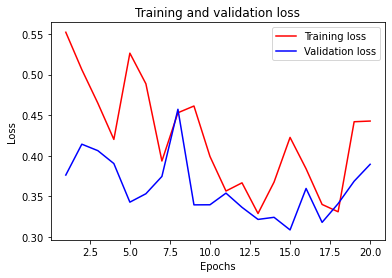

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model_1.evaluate(X_test, y_test, verbose=1)
history_dict=hist_model_1.history
history_dict.keys()

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

do the same with dataset2.csv

In [8]:
x2, y2, a2= data_process.process_data('dataset2.csv', "CNN")
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
val_data2 = (X_test2,y_test2)


model:

In [9]:
input_shape=(48, 48, 1)
num_classes = 4

model_2 = Sequential()

model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same', input_shape=input_shape))
model_2.add(Activation('relu'))

model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        25632     
_________________________________________________________________
activation_5 (Activation)    (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

data generator

In [47]:
%%time
data_generator2 = ImageDataGenerator(
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        horizontal_flip=True)
batch_size = 32
opt2 = RMSprop(lr=0.0005, decay=1e-6)

model_2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_2 = model_2.fit_generator(data_generator2.flow(X_train2, y_train2,
                                            batch_size),
                        epochs=20, verbose=1,validation_data =val_data2)

Epoch 1/20
11/11 [==============================] - 1s 103ms/step - loss: 0.3696 - accuracy: 0.8629 - val_loss: 0.1678 - val_accuracy: 0.9371
Epoch 2/20
11/11 [==============================] - 1s 93ms/step - loss: 0.3233 - accuracy: 0.8847 - val_loss: 0.2164 - val_accuracy: 0.8994
Epoch 3/20
11/11 [==============================] - 1s 93ms/step - loss: 0.2765 - accuracy: 0.8879 - val_loss: 0.1794 - val_accuracy: 0.9119
Epoch 4/20
11/11 [==============================] - 1s 92ms/step - loss: 0.4183 - accuracy: 0.8380 - val_loss: 0.2015 - val_accuracy: 0.9119
Epoch 5/20
11/11 [==============================] - 1s 92ms/step - loss: 0.3184 - accuracy: 0.8754 - val_loss: 0.1782 - val_accuracy: 0.9371
Epoch 6/20
11/11 [==============================] - 1s 89ms/step - loss: 0.2791 - accuracy: 0.8910 - val_loss: 0.1690 - val_accuracy: 0.9371
Epoch 7/20
11/11 [==============================] - 1s 92ms/step - loss: 0.3097 - accuracy: 0.8785 - val_loss: 0.1733 - val_accuracy: 0.9245
Epoch 8/20
1

plot

5/5 [==============================] - 0s 11ms/step - loss: 0.3334 - accuracy: 0.8679


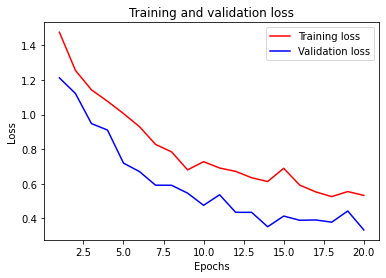

In [11]:
score2 = model_2.evaluate(X_test2, y_test2, verbose=1)
history_dict2=hist_model_2.history
history_dict2.keys()

train_loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(history_dict2['accuracy']) + 1)

plt.plot(epochs2, train_loss_values2, 'r', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

compare classification metrics


In [12]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns

metrics = list()
cm = dict()
y_pred = model_1.predict(X_test)
y_pred_class = model_1.predict_classes(X_test, verbose=0)
rounded_labels = np.argmax(y_test, axis=1)

precision, recall, fscore, _ = score(rounded_labels, y_pred_class, average='weighted')
accuracy = accuracy_score(rounded_labels, y_pred_class)
auc = roc_auc_score(y_test, y_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy, 'auc':auc}, name="model1"))
cm = confusion_matrix(rounded_labels,y_pred_class)

metrics2 = list()
cm2 = dict()
y_pred2 = model_2.predict(X_test2)
y_pred_class2 = model_2.predict_classes(X_test2, verbose=0)
rounded_labels2 = np.argmax(y_test2, axis=1)

precision2, recall2, fscore2, _ = score(rounded_labels2, y_pred_class2, average='weighted')
accuracy2 = accuracy_score(rounded_labels2, y_pred_class2)
auc2 = roc_auc_score(y_test2, y_pred2)
metrics2.append(pd.Series({'precision':precision2, 'recall':recall2, 'fscore':fscore2, 'accuracy':accuracy2, 'auc':auc2}, name="model2"))
cm2 = confusion_matrix(rounded_labels2,y_pred_class2)
m = metrics + metrics2
metrics = pd.concat(m, axis=1)

metrics


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,model1,model2
precision,0.833893,0.875667
recall,0.805031,0.867925
fscore,0.768867,0.860301
accuracy,0.805031,0.867925
auc,0.957184,0.974758


In [13]:

def get_unique_N(iterable):
    seen = set()
    for e in iterable:
        if e in seen:
            continue
        seen.add(e)
        yield e

k = get_unique_N(a)
print(list(k))

['happy', 'sadness', 'contempt', 'anger']


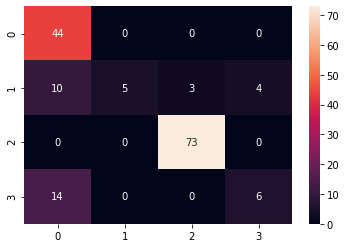

In [14]:
ax = sns.heatmap(cm, annot=True, fmt='d')

In [15]:
k2 = get_unique_N(a2)
print(list(k2))

['happy', 'sadness', 'anger', 'contempt']


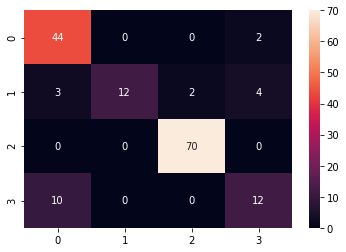

In [16]:
ax2 = sns.heatmap(cm2, annot=True, fmt='d')


In [17]:
input_shape=(48, 48, 1)
num_classes = 4

model_3 = Sequential()

model_3.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=input_shape))
model_3.add(Activation('relu'))

model_3.add(Conv2D(32, (5, 5), strides = (2,2)))
model_3.add(Activation('relu'))

model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [21]:
%%time
model_3.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_3 = model_3.fit(X_train, y_train,batch_size, epochs=20, verbose=1,validation_data =val_data)

Epoch 1/20
11/11 [==============================] - 0s 22ms/step - loss: 1.2468 - accuracy: 0.4237 - val_loss: 1.1243 - val_accuracy: 0.4654
Epoch 2/20
11/11 [==============================] - 0s 12ms/step - loss: 1.0470 - accuracy: 0.5358 - val_loss: 0.9447 - val_accuracy: 0.6289
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8399 - accuracy: 0.6667 - val_loss: 0.7320 - val_accuracy: 0.7170
Epoch 4/20
11/11 [==============================] - 0s 13ms/step - loss: 0.6783 - accuracy: 0.7196 - val_loss: 0.6126 - val_accuracy: 0.7358
Epoch 5/20
11/11 [==============================] - 0s 12ms/step - loss: 0.6312 - accuracy: 0.7601 - val_loss: 0.6438 - val_accuracy: 0.7044
Epoch 6/20
11/11 [==============================] - 0s 13ms/step - loss: 0.5316 - accuracy: 0.8100 - val_loss: 0.5726 - val_accuracy: 0.7547
Epoch 7/20
11/11 [==============================] - 0s 12ms/step - loss: 0.4848 - accuracy: 0.7850 - val_loss: 0.5188 - val_accuracy: 0.7862
Epoch 8/20
11

5/5 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9182


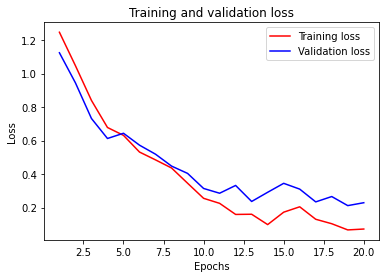

In [22]:
score2 = model_3.evaluate(X_test, y_test, verbose=1)
history_dict2=hist_model_3.history
history_dict2.keys()

train_loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(history_dict2['accuracy']) + 1)

plt.plot(epochs2, train_loss_values2, 'r', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
%%time
model = Sequential()
model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_3 = model.fit(X_train, y_train,batch_size, epochs=20, verbose=1,validation_data =val_data)

Epoch 1/20
11/11 [==============================] - 1s 105ms/step - loss: 1.2983 - accuracy: 0.3925 - val_loss: 1.2401 - val_accuracy: 0.4654
Epoch 2/20
11/11 [==============================] - 1s 94ms/step - loss: 1.2138 - accuracy: 0.5202 - val_loss: 1.1632 - val_accuracy: 0.4591
Epoch 3/20
11/11 [==============================] - 1s 91ms/step - loss: 1.0980 - accuracy: 0.5607 - val_loss: 0.8380 - val_accuracy: 0.6667
Epoch 4/20
11/11 [==============================] - 1s 90ms/step - loss: 0.8597 - accuracy: 0.6199 - val_loss: 0.7133 - val_accuracy: 0.7233
Epoch 5/20
11/11 [==============================] - 1s 92ms/step - loss: 0.5996 - accuracy: 0.7570 - val_loss: 0.5166 - val_accuracy: 0.7736
Epoch 6/20
11/11 [==============================] - 1s 91ms/step - loss: 0.5130 - accuracy: 0.7944 - val_loss: 0.5042 - val_accuracy: 0.7673
Epoch 7/20
11/11 [==============================] - 1s 93ms/step - loss: 0.4746 - accuracy: 0.7944 - val_loss: 0.5031 - val_accuracy: 0.7610
Epoch 8/20
1

5/5 [==============================] - 0s 11ms/step - loss: 0.1954 - accuracy: 0.9308


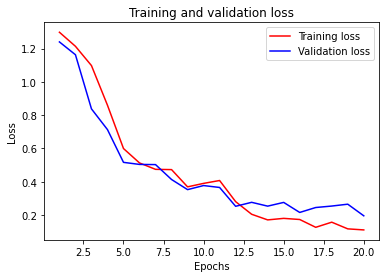

In [32]:
score2 = model.evaluate(X_test, y_test, verbose=1)
history_dict2=hist_model_3.history
history_dict2.keys()

train_loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(history_dict2['accuracy']) + 1)

plt.plot(epochs2, train_loss_values2, 'r', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
%%time
model = Sequential()
model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_3 = model.fit(X_train, y_train,batch_size, epochs=20, verbose=1,validation_data =val_data)

Epoch 1/20
11/11 [==============================] - 8s 692ms/step - loss: 2.1952 - accuracy: 0.3583 - val_loss: 1.3362 - val_accuracy: 0.2767
Epoch 2/20
11/11 [==============================] - 8s 689ms/step - loss: 1.3104 - accuracy: 0.3240 - val_loss: 1.2709 - val_accuracy: 0.4591
Epoch 3/20
11/11 [==============================] - 8s 690ms/step - loss: 1.2808 - accuracy: 0.4174 - val_loss: 1.2710 - val_accuracy: 0.4591
Epoch 4/20
11/11 [==============================] - 8s 686ms/step - loss: 1.2833 - accuracy: 0.4174 - val_loss: 1.2697 - val_accuracy: 0.4591
Epoch 5/20
11/11 [==============================] - 8s 694ms/step - loss: 1.2857 - accuracy: 0.4174 - val_loss: 1.3098 - val_accuracy: 0.4591
Epoch 6/20
11/11 [==============================] - 8s 694ms/step - loss: 1.2940 - accuracy: 0.4174 - val_loss: 1.3079 - val_accuracy: 0.4591
Epoch 7/20
11/11 [==============================] - 8s 698ms/step - loss: 1.2866 - accuracy: 0.4174 - val_loss: 1.2774 - val_accuracy: 0.4591
Epoch 

In [43]:
%%time
model = Sequential()
model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, (5, 5), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_model_3 = model.fit(X_train, y_train,batch_size, epochs=20, verbose=1,validation_data =val_data)

Epoch 1/20
11/11 [==============================] - 1s 102ms/step - loss: 1.3250 - accuracy: 0.3614 - val_loss: 1.2605 - val_accuracy: 0.4591
Epoch 2/20
11/11 [==============================] - 1s 91ms/step - loss: 1.2574 - accuracy: 0.4143 - val_loss: 1.2445 - val_accuracy: 0.4591
Epoch 3/20
11/11 [==============================] - 1s 90ms/step - loss: 1.2568 - accuracy: 0.4206 - val_loss: 1.2180 - val_accuracy: 0.4591
Epoch 4/20
11/11 [==============================] - 1s 91ms/step - loss: 1.2866 - accuracy: 0.4143 - val_loss: 1.2094 - val_accuracy: 0.4591
Epoch 5/20
11/11 [==============================] - 1s 89ms/step - loss: 1.1089 - accuracy: 0.4642 - val_loss: 0.9508 - val_accuracy: 0.6792
Epoch 6/20
11/11 [==============================] - 1s 90ms/step - loss: 1.1408 - accuracy: 0.5452 - val_loss: 1.0765 - val_accuracy: 0.5786
Epoch 7/20
11/11 [==============================] - 1s 91ms/step - loss: 0.9934 - accuracy: 0.6044 - val_loss: 0.8252 - val_accuracy: 0.6855
Epoch 8/20
1

5/5 [==============================] - 0s 11ms/step - loss: 0.5221 - accuracy: 0.7610


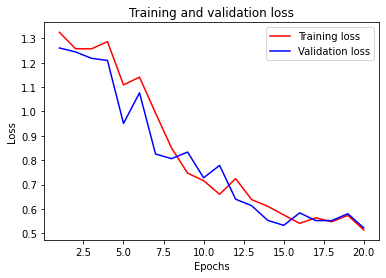

In [45]:
score2 = model.evaluate(X_test, y_test, verbose=1)
history_dict2=hist_model_3.history
history_dict2.keys()

train_loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs2 = range(1, len(history_dict2['accuracy']) + 1)

plt.plot(epochs2, train_loss_values2, 'r', label='Training loss')
plt.plot(epochs2, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()